In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


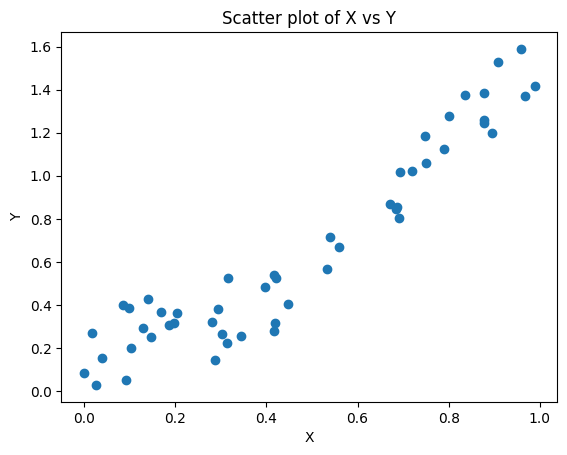

In [31]:
np.random.seed(1)
X = np.random.rand(50,1)
Y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*X + \
    0.4*np.random.rand(50,1) # noise(no data is perfect in real world)

fig = plt.figure()
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

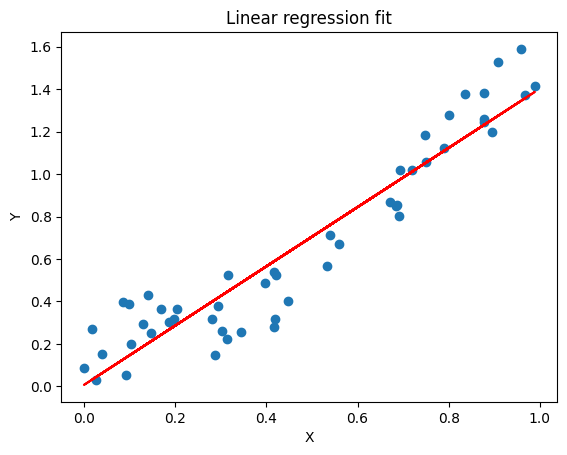

0.8919326382437994

In [33]:
model = LinearRegression()
model.fit(X,Y)

output = model.predict(X)

fig = plt.figure()
plt.scatter(X,Y)
plt.plot(X,output,color='r')
plt.xlabel('X')
plt.ylabel('Y') 
plt.title('Linear regression fit')
plt.show()

display(model.score(X,Y)) # R^2 value

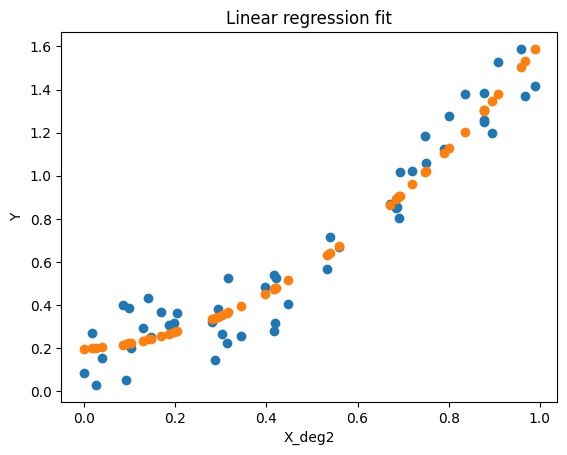

0.937213227713278

In [34]:
# Polynomial regression model of degree 2
X_deg2 = np.hstack([X,X**2])
model = LinearRegression()
model.fit(X_deg2,Y)

output = model.predict(X_deg2)

fig = plt.figure()
plt.scatter(X,Y, label='Data points')
plt.scatter(X,output,label='Predicted')
plt.xlabel('X_deg2')
plt.ylabel('Y') 
plt.title('Linear regression fit')
plt.show()

display(model.score(X_deg2,Y)) # R^2 value

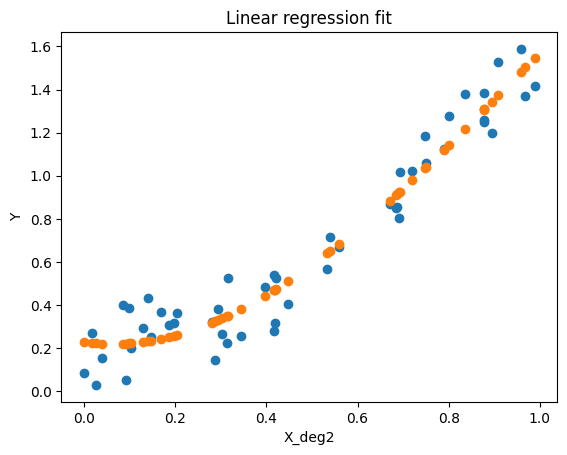

0.9384895307987052

In [35]:
# Polynomial regression model of degree 2
X_deg3 = np.hstack([X,X**2, X**3])
model = LinearRegression()
model.fit(X_deg3,Y)

output = model.predict(X_deg3)

fig = plt.figure()
plt.scatter(X,Y, label='Data points')
plt.scatter(X,output,label='Predicted')
plt.xlabel('X_deg2')
plt.ylabel('Y') 
plt.title('Linear regression fit')
plt.show()

display(model.score(X_deg3,Y)) # R^2 value

In [36]:
from sklearn.preprocessing import PolynomialFeatures
scaler = StandardScaler()
poly = PolynomialFeatures()

In [37]:
poly = PolynomialFeatures(degree=2) # Polynomial features of degree 2

X_poly = poly.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)

model = LinearRegression()
model.fit(X_poly_scaled,Y)

print(model.score(X_poly_scaled,Y)) # R^2 value

0.937213227713278


In [38]:
poly = PolynomialFeatures(degree=3) # Polynomial features of degree 2

X_poly = poly.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)

model = LinearRegression()
model.fit(X_poly_scaled,Y)

print(model.score(X_poly_scaled,Y)) # R^2 value

0.9384895307987052


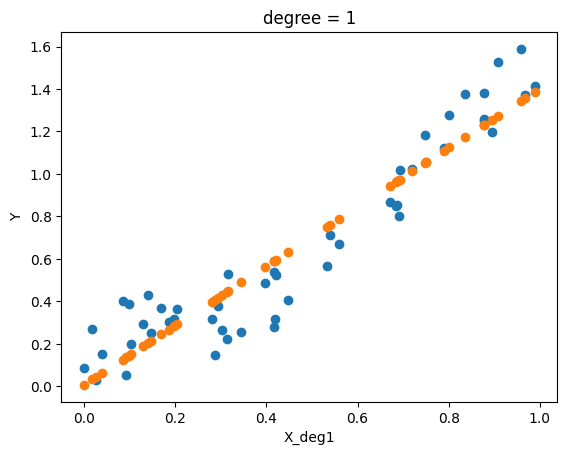

0.8919326382437994

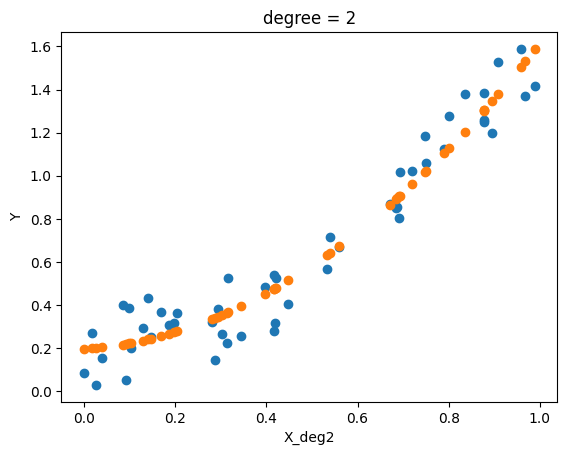

0.937213227713278

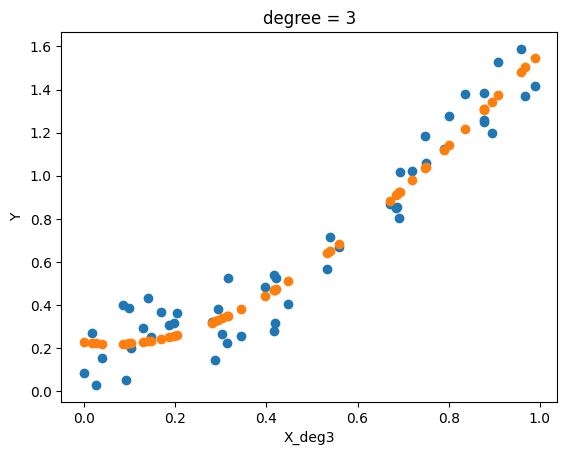

0.9384895307987052

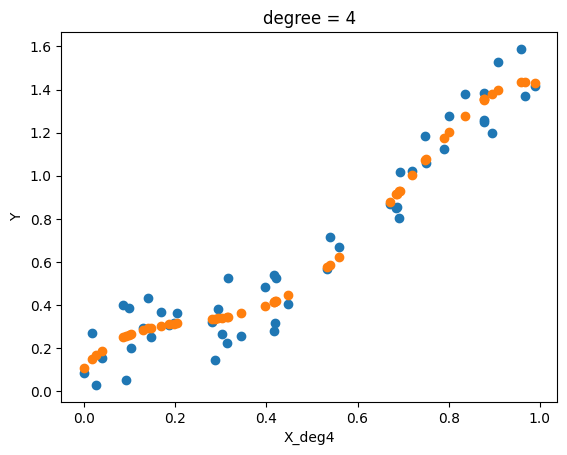

0.9509958355607928

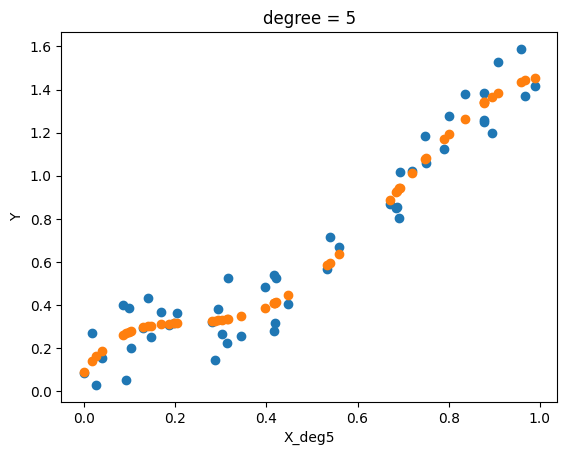

0.9515258649694076

In [39]:
scores = []
for i in range(1, 6):
    poly = PolynomialFeatures(degree=i) # Polynomial features of degree 2
    scaler = StandardScaler()
    X_poly = poly.fit_transform(X)

    X_poly_scaled = scaler.fit_transform(X_poly)

    model = LinearRegression()
    model.fit(X_poly_scaled,Y)
    output = model.predict(X_poly_scaled)
    fig = plt.figure()
    plt.scatter(X,Y, label='Data points')
    plt.scatter(X,output,label='Predicted')
    plt.xlabel(f'X_deg{i}')
    plt.ylabel('Y')
    plt.title(f"degree = {i}")
    plt.show()
    display(model.score(X_poly_scaled,Y)) # R^2 value
    scores.append(model.score(X_poly_scaled,Y)) # R^2 value

In [40]:
scores = []
for i in range(1, 40):
    poly = PolynomialFeatures(degree=i) # Polynomial features of degree 2
    scaler = StandardScaler()
    X_poly = poly.fit_transform(X)

    X_poly_scaled = scaler.fit_transform(X_poly)

    model = LinearRegression()
    model.fit(X_poly_scaled,Y)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled,Y)) # R^2 value

max_pol = np.argmax(scores)
print(f"Maximum R^2 value is for degree = {max_pol} with R^2 = {scores[max_pol]}")

Maximum R^2 value is for degree = 29 with R^2 = 0.9674437497972226


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
np.random.seed(1)
X = np.random.rand(100,1)
Y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*X + \
    0.4*np.random.rand(100,1) # noise(no data is perfect in real world)



In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

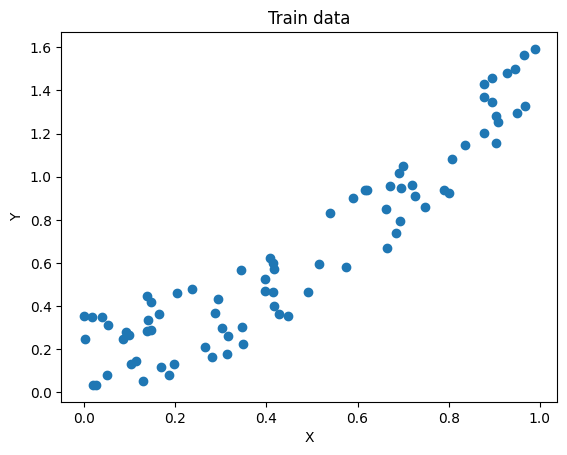

In [44]:
plt.scatter(X_train, Y_train, label='Train data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train data')
plt.show()

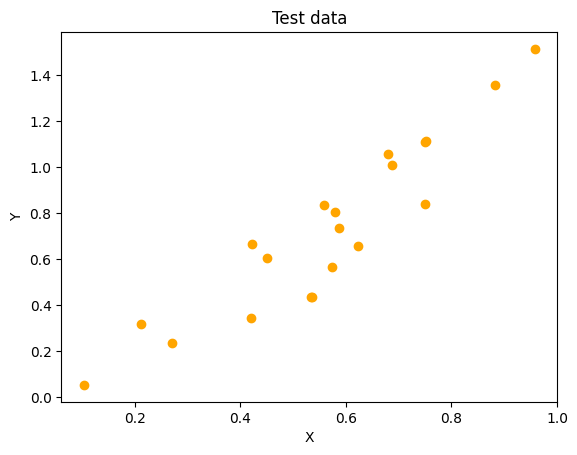

In [45]:
plt.scatter(X_test, Y_test, label='Test data', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test data')
plt.show()

In [47]:
# Sequence :create polynomial features -> scale the features -> fit the model -> predict -> evaluate

from sklearn.pipeline import make_pipeline


degree = 5
polyreg_scaled = make_pipeline(PolynomialFeatures(degree=degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, Y_train)
display(polyreg_scaled.score(X_train, Y_train)) # R^2 value for train data
display(polyreg_scaled.score(X_test, Y_test)) # R^2 value for test data

0.9214962587812688

0.8656262710391975

In [48]:
degree = 30
polyreg_scaled = make_pipeline(PolynomialFeatures(degree=degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, Y_train)
display(polyreg_scaled.score(X_train, Y_train)) # R^2 value for train data
display(polyreg_scaled.score(X_test, Y_test)) # R^2 value for test data

0.9368836092912819

0.8041658291264446

In [49]:
degree = 1
polyreg_scaled = make_pipeline(PolynomialFeatures(degree=degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train, Y_train)
display(polyreg_scaled.score(X_train, Y_train)) # R^2 value for train data
display(polyreg_scaled.score(X_test, Y_test)) # R^2 value for test data

0.8740205794555178

0.8073308228555811

In [50]:
degree = 32 
train_scores = []
test_scores = []
for i in range(1, degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree=i), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, Y_train)
    train_scores.append(polyreg_scaled.score(X_train, Y_train)) # R^2 value for train data
    test_scores.append(polyreg_scaled.score(X_test, Y_test)) # R^2 value for test data

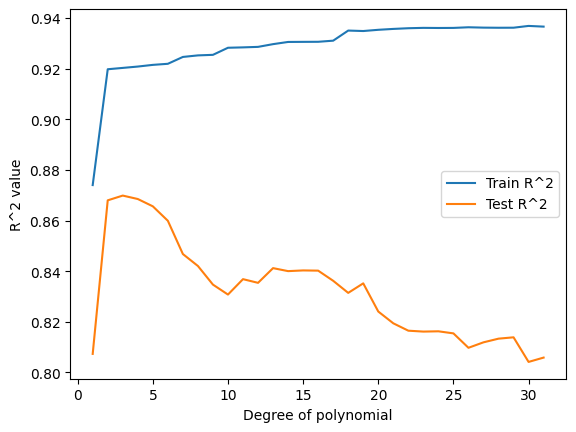

In [54]:
plt.figure()
plt.plot(list(range(1, degree)), train_scores, label='Train R^2')
plt.plot(list(range(1, degree)), test_scores, label='Test R^2')
plt.xlabel('Degree of polynomial')
plt.ylabel('R^2 value')
plt.legend(loc = 'center right')
plt.show()

In [55]:
from sklearn.model_selection import KFold

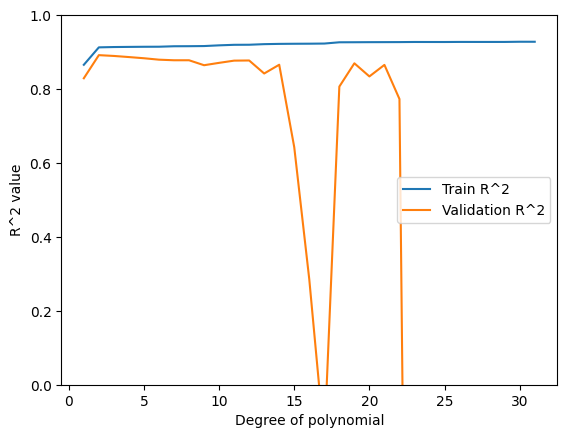

In [61]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

degree = 32
train_scores = []
test_scores = []

for d in range(1, degree):
    fold_train_scores = []
    fold_test_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        polyreg_scaled = make_pipeline(PolynomialFeatures(degree=d), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, Y_train)
        fold_train_scores.append(polyreg_scaled.score(X_train, Y_train)) # R^2 value for train data
        fold_test_scores.append(polyreg_scaled.score(X_test, Y_test)) # R^2 value for test data
    
    train_scores.append(np.mean(fold_train_scores))
    test_scores.append(np.mean(fold_test_scores))


plt.figure()
plt.plot(list(range(1, degree)), train_scores, label='Train R^2')
plt.plot(list(range(1, degree)), test_scores, label='Validation R^2')
plt.xlabel('Degree of polynomial')
plt.ylabel('R^2 value')
plt.ylim(0,1)
plt.legend(loc = 'center right')
plt.show()


* Here we can tell things in this graph that our model is generalize for all test data

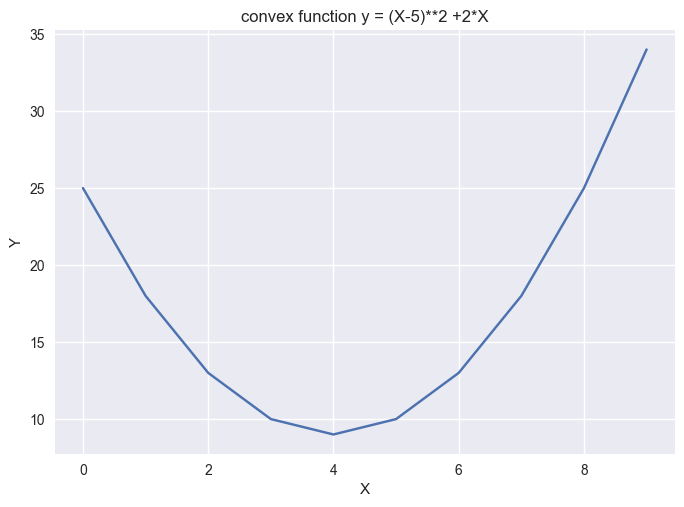

In [ ]:
X = np.arange(10)
Y = (X-5)**2 + 2*X # here we add 2*X to shift the vertex from origin for preventing overfitting
plt.style.use('seaborn-v0_8')
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('convex function y = (X-5)**2 +2*X')
plt.show()

In [ ]:
# Regularization techniques: Lasso, Ridge, ElasticNet
# Regularization is works well with more degree of polynomial features because it reduces the complexity of the model by penalizing the coefficients of the features
from sklearn.linear_model import Lasso, Ridge, ElasticNet
np.random.seed(1)
X = np.random.rand(100,1)
Y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*X + \
    0.4*np.random.rand(100,1) # noise(no data is perfect in real world)

degree = 4
poly = PolynomialFeatures(degree=degree) # Polynomial features of degree 2
x_poly = poly.fit_transform(X)
x_poly_scaled = scaler.fit_transform(x_poly)

X_train, X_test, Y_train, Y_test = train_test_split(x_poly_scaled, Y, test_size=0.2, random_state=1)

linear = LinearRegression()
linear.fit(X_train, Y_train)
display("Linear model coef",linear.coef_)

# Here for lasso, ridge and elastic net we are using alpha = 1, alpha is the regularization parameter, you can try with different values of alpha
# Aplha is a hyperparameter, you can tune it using grid search or random search or bayesian optimization

lass = Lasso(alpha=1)
lass.fit(X_train, Y_train)
display("Lasso model coef",lass.coef_)

ridg = Ridge(alpha=1)
ridg.fit(X_train, Y_train)
display("Ridge model coef",ridg.coef_)

elastic = ElasticNet(alpha=1)
elastic.fit(X_train, Y_train)
display("ElasticNet model coef",elastic.coef_)

print("Train performance")
display("Linear model R^2",linear.score(X_train, Y_train))
display("Lasso model R^2",lass.score(X_train, Y_train))
display("Ridge model R^2",ridg.score(X_train, Y_train))
display("ElasticNet model R^2",elastic.score(X_train, Y_train))

'Linear model coef'

array([[ 0.        , -0.20324497,  1.35760606, -1.31496829,  0.56021759]])

'Lasso model coef'

array([0., 0., 0., 0., 0.])

'Ridge model coef'

array([0.        , 0.11767316, 0.17504183, 0.09863686, 0.01325894])

'ElasticNet model coef'

array([0., 0., 0., 0., 0.])

Train performance


'Linear model R^2'

0.9208331410943666

'Lasso model R^2'

0.0

'Ridge model R^2'

0.9184212506285484

'ElasticNet model R^2'

0.0